In [1]:
# GLOBAL VARIABLES. BE SURE NOT TO OVERWRITE THEM
D = 8 # Amount of documents
V = 12 # Size of the vocabulary

# (Approximate) Maximum allowed amount of same word repetition in a document (it may be lower in practise due to the data generation strategy)
# To get the actual maximum amount, call Simulator.get_M
M = 10 


k = 5 # Amount of topics
gamma = 0.2  #

In [2]:
# GLOBAL VARIABLES. BE SURE NOT TO OVERWRITE THEM
D = 100 # Amount of documents
V = 18 # Size of the vocabulary

# (Approximate) Maximum allowed amount of same word repetition in a document (it may be lower in practise due to the data generation strategy)
# To get the actual maximum amount, call Simulator.get_M
M = 5 

k = 6 # Amount of topics
gamma = 0.2

# FA: Since we're testing so much, lets agree on using just 1 small set of global variables for now

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

From now on let's use the following simulated data for further testing

In [4]:
from simulator import Simulator

In [5]:
test_data = Simulator(D, V, M, k, gamma, seed=1967)  # Man on the moon
test_data.generate_all_data()

random_initial_data = Simulator(D, V, M, k, gamma, seed=1969)  # Woodstock Music Festival
random_initial_data.generate_non_informative()

Success: Sigma transformed from K
Success: G transformed from K
Success: W and Z generated
Success: E transformed from Z
Success: C transformed from Z
Success: G transformed from K
Success: W and Z generated
Success: E transformed from Z
Success: C transformed from Z


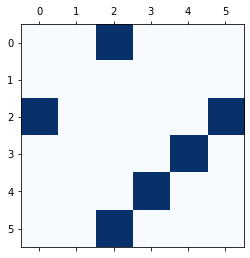

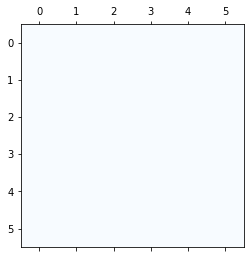

In [6]:
plt.matshow(test_data.G, cmap='Blues')
plt.matshow(random_initial_data.G, cmap='Blues')

# 2. MC SAMPLER

## 2.2.1 Sampling B

### Task:

You must implement a function that receives matrices $C_i$ and vector $\alpha$ and generates the next $B_{i+1}$.

In [7]:
from samplers import MC_sample_B

## 2.2.2 B sampling tests

In [8]:
# Check that the function runs with no issues, without side effects
alpha = np.ones(V)
C_copy = test_data.C.copy()

B_sample = MC_sample_B(alpha, C_copy)

assert np.all(C_copy == test_data.C)

In [9]:
B_sample.shape  # k, V -> Fixed

(6, 18)

In [10]:
%%time
# Check that the Sampler works properly (This will take a while)
Berrors = []
matrix_changes = []
burn_in = 1000
print(f'The sampled B has {B_sample.size} words, while the target B has {test_data.B.size} words (diff {abs(B_sample.size-test_data.B.size)})')
for i in range(5000):
    B_sample_old = B_sample.copy()
    B_sample = MC_sample_B(alpha, C_copy)
    matrix_changes.append(~np.all(B_sample_old == B_sample))
    if i >= burn_in:
        err_by_it = []
        for topic in range(k):
            err_by_it.append(np.linalg.norm(B_sample[topic] - test_data.B[topic]))  # Computing error wrt the target distribution  # BUG https://trello.com/c/uEYV7fSC/32-mcsampleb-shape-mismatch
        Berrors.append(err_by_it)

The sampled B has 108 words, while the target B has 108 words (diff 0)
Wall time: 1.97 s


Matrix changes (1 = changed, 0 = same)
count    5000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64


<AxesSubplot:>

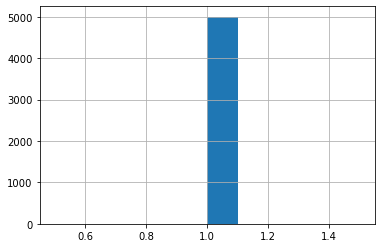

In [11]:
# Matrix should change
matrix_changes = pd.Series(matrix_changes).astype(int)
print("Matrix changes (1 = changed, 0 = same)")
print(matrix_changes.describe())
matrix_changes.hist()

B L2-error metrics
                 0            1            2            3            4  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.056792     0.065975     0.062738     0.055784     0.051242   
std       0.008610     0.012368     0.010803     0.009487     0.008594   
min       0.026892     0.026546     0.029507     0.026968     0.025441   
25%       0.050921     0.057425     0.055277     0.049152     0.045287   
50%       0.056616     0.066014     0.062443     0.055501     0.051101   
75%       0.062415     0.073959     0.069671     0.062033     0.057058   
max       0.090887     0.110513     0.105525     0.094581     0.080337   

                 5  
count  4000.000000  
mean      0.063863  
std       0.010755  
min       0.027961  
25%       0.056362  
50%       0.063806  
75%       0.071360  
max       0.101322  


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>]], dtype=object)

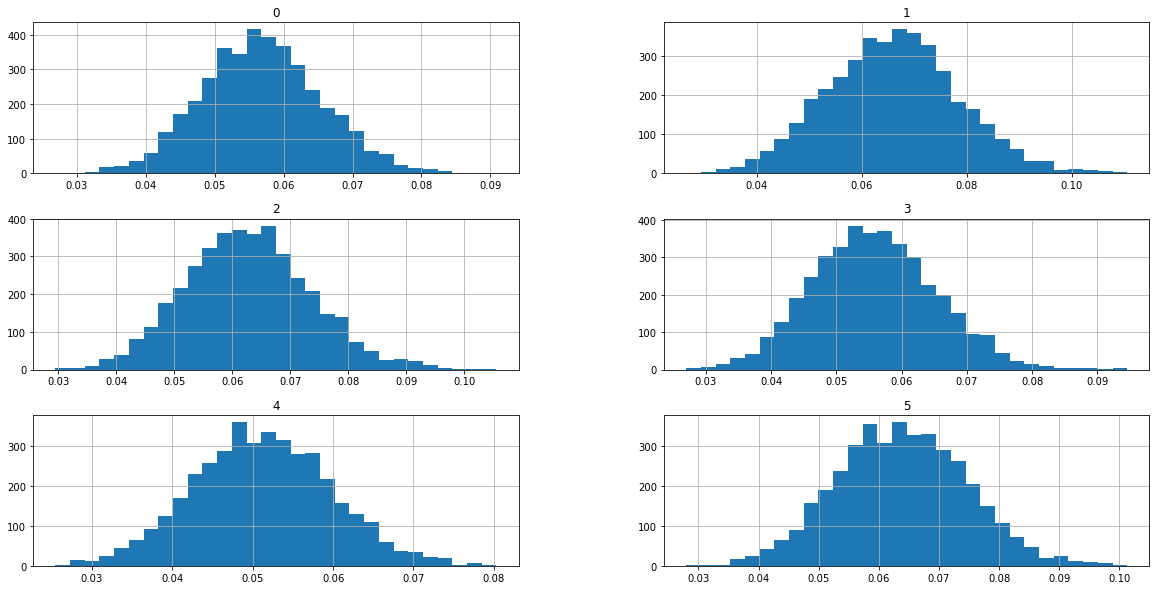

In [12]:
# Error should be distributed close to 0 (I guess...)  # BUG https://trello.com/c/JE1T7Hur/31-mcsamplez-z-is-not-close-to-the-expected-target
errors = pd.DataFrame(Berrors)
print("B L2-error metrics")
print(errors.describe())
errors.hist(bins=30, layout=(3,2), figsize=(20, 10))

Text(0.5, 1.0, 'B L2-error series')

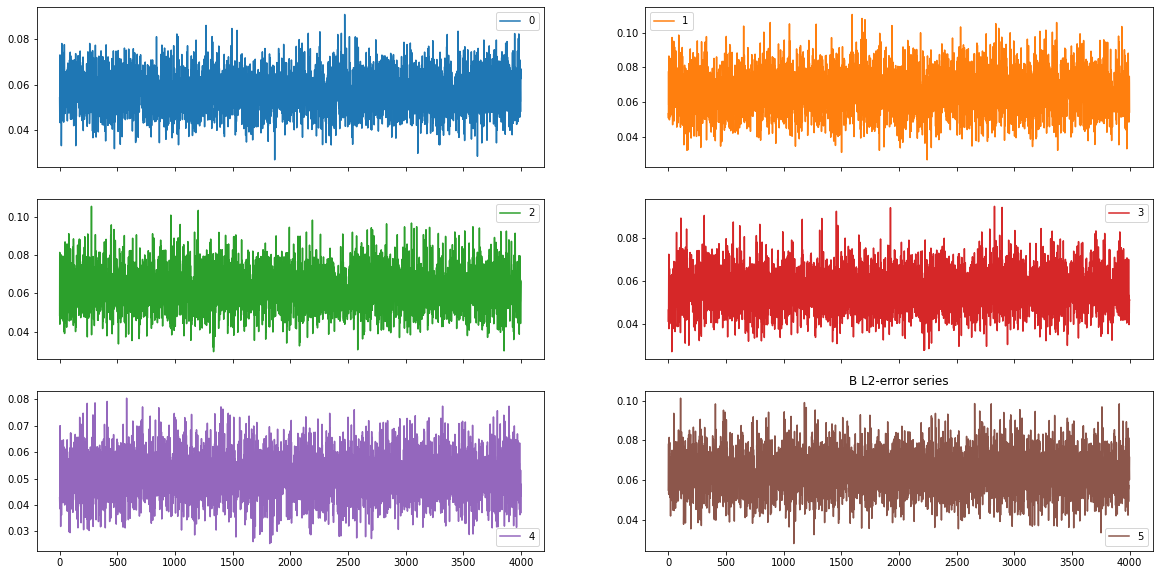

In [13]:
errors.plot(subplots=True, layout=(3,2), figsize=(20, 10))
plt.title('B L2-error series')